<a href="https://colab.research.google.com/github/hannanote/Mobile_Health_Human_Behavior_Analysis_Project/blob/main/MOBILE_HEALTH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mobile Health Human Behavior Analysis Project
#### This project is predict human behavior based on multimodel body sensing.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelBinarizer
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import os
import math
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#### import data folder
##### https://archive.ics.uci.edu/dataset/319/mhealth+dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Downloading data from UCI Machine Learning repository
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/00319/MHEALTHDATASET.zip
!unzip MHEALTHDATASET.zip

--2025-01-22 14:45:15--  http://archive.ics.uci.edu/ml/machine-learning-databases/00319/MHEALTHDATASET.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘MHEALTHDATASET.zip’

MHEALTHDATASET.zip      [           <=>      ]  72.07M  31.2MB/s    in 2.3s    

2025-01-22 14:45:18 (31.2 MB/s) - ‘MHEALTHDATASET.zip’ saved [75567983]

Archive:  MHEALTHDATASET.zip
   creating: MHEALTHDATASET/
  inflating: MHEALTHDATASET/mHealth_subject1.log  
  inflating: MHEALTHDATASET/mHealth_subject10.log  
  inflating: MHEALTHDATASET/mHealth_subject2.log  
  inflating: MHEALTHDATASET/mHealth_subject3.log  
  inflating: MHEALTHDATASET/mHealth_subject4.log  
  inflating: MHEALTHDATASET/mHealth_subject5.log  
  inflating: MHEALTHDATASET/mHealth_subject6.log  
  inflating: MHEALTHDATASET/mHealth_subject7.log  
  inflating: 

In [3]:
# checking lists on the file
os.listdir('MHEALTHDATASET/')

['README.txt',
 'mHealth_subject5.log',
 'mHealth_subject10.log',
 'mHealth_subject8.log',
 'mHealth_subject3.log',
 'mHealth_subject4.log',
 'mHealth_subject2.log',
 'mHealth_subject9.log',
 'mHealth_subject6.log',
 'mHealth_subject1.log',
 'mHealth_subject7.log']

In [4]:
# Exclude 'README.txt' file
for file in os.listdir('MHEALTHDATASET/'):
  if  file != ('README.txt'):
    print(file)

mHealth_subject5.log
mHealth_subject10.log
mHealth_subject8.log
mHealth_subject3.log
mHealth_subject4.log
mHealth_subject2.log
mHealth_subject9.log
mHealth_subject6.log
mHealth_subject1.log
mHealth_subject7.log


### Import the data and Data Exploration
#### 10 volunteers who performed 12 different physical activites.

In [5]:
# combine all data
df = pd.DataFrame()

for i in range(1,11):
  df1 = pd.read_csv(f'MHEALTHDATASET/mHealth_subject{i}.log', header=None, sep='\t')
  df1 = df1.loc[:, [5,6,7,8,9,10,14,15,16,17,18,19, 23]]
  df1 = df1.rename(columns={
      5:"alx", 6:"aly", 7:"alz", 8:"glx", 9:"gly", 10:"glz", 14:"arx",15:"ary", 16:"arz", 17:"grx", 18:"gry", 19:"grz", 23:"Activity"
      })
  df = pd.concat([df, df1])
df
#1215745 rows × 24 columns
# 1215745 rows × 13 columns

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity
0,2.1849,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-8.6499,-4.5781,0.187760,-0.449020,-1.01030,0.034483,0
1,2.3876,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-8.6275,-4.3198,0.023595,-0.449020,-1.01030,0.034483,0
2,2.4086,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-8.5055,-4.2772,0.275720,-0.449020,-1.01030,0.034483,0
3,2.1814,-9.4301,0.55031,0.085343,-0.83865,-0.68369,-8.6279,-4.3163,0.367520,-0.456860,-1.00820,0.025862,0
4,2.4173,-9.3889,0.71098,0.085343,-0.83865,-0.68369,-8.7008,-4.1459,0.407290,-0.456860,-1.00820,0.025862,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
98299,1.7849,-9.8287,0.29725,-0.341370,-0.90056,-0.61493,-3.7198,-8.9071,0.294230,0.041176,-0.99384,-0.480600,0
98300,1.8687,-9.8766,0.46236,-0.341370,-0.90056,-0.61493,-3.7160,-8.7455,0.448140,0.041176,-0.99384,-0.480600,0
98301,1.6928,-9.9290,0.16631,-0.341370,-0.90056,-0.61493,-3.8824,-9.1155,0.450480,0.041176,-0.99384,-0.480600,0
98302,1.5279,-9.6306,0.30458,-0.341370,-0.90056,-0.61493,-3.5564,-9.1441,0.594880,0.041176,-0.99384,-0.480600,0


#### The activities labels
##### Column 0: acceleration from the chest sensor (X axis)
##### Column 1: acceleration from the chest sensor (Y axis)
##### Column 2: acceleration from the chest sensor (Z axis)
##### Column 3: electrocardiogram signal (lead 1)
##### Column 4: electrocardiogram signal (lead 2)
##### Column 5: acceleration from the left-ankle sensor (X axis)
##### Column 6: acceleration from the left-ankle sensor (Y axis)
##### Column 7: acceleration from the left-ankle sensor (Z axis)
##### Column 8: gyro from the left-ankle sensor (X axis)
##### Column 9: gyro from the left-ankle sensor (Y axis)
##### Column 10: gyro from the left-ankle sensor (Z axis)
##### Column 11: magnetometer from the left-ankle sensor (X axis)
##### Column 12: magnetometer from the left-ankle sensor (Y axis)
##### Column 13: magnetometer from the left-ankle sensor (Z axis)
##### Column 14: acceleration from the right-lower-arm sensor (X axis)
##### Column 15: acceleration from the right-lower-arm sensor (Y axis)
##### Column 16: acceleration from the right-lower-arm sensor (Z axis)
##### Column 17: gyro from the right-lower-arm sensor (X axis)
##### Column 18: gyro from the right-lower-arm sensor (Y axis)
##### Column 19: gyro from the right-lower-arm sensor (Z axis)
##### Column 20: magnetometer from the right-lower-arm sensor (X axis)
##### Column 21: magnetometer from the right-lower-arm sensor (Y axis)
##### Column 22: magnetometer from the right-lower-arm sensor (Z axis)
##### Column 23: Label (0 for the null class)
##### ====================================================================
##### features: df[0:22]
##### target: df[23]

### Column information

##### Column 0: acceleration from the left-ankle sensor (X axis)
##### Column 1: acceleration from the left-ankle sensor (Y axis)
##### Column 2: acceleration from the left-ankle sensor (Z axis)
##### Column 3: gyro from the left-ankle sensor (X axis)
##### Column 4: gyro from the left-ankle sensor (Y axis)
##### Column 5: gyro from the left-ankle sensor (Z axis)

##### Column 6: acceleration from the right-lower-arm sensor (X axis)
##### Column 7: acceleration from the right-lower-arm sensor (Y axis)
##### Column 8: acceleration from the right-lower-arm sensor (Z axis)
##### Column 9: gyro from the right-lower-arm sensor (X axis)
##### Column 10: gyro from the right-lower-arm sensor (Y axis)
##### Column 11: gyro from the right-lower-arm sensor (Z axis)

##### Column 12: Label (0 for the null class)

In [6]:
df['Activity'].value_counts()

,count
Activity,
0,872550
1,30720
2,30720
3,30720
4,30720
9,30720
10,30720
11,30720
5,30720


### 12 physical activites
##### L1: Standing still (1 min)
##### L2: Sitting and relaxing (1 min)
##### L3: Lying down (1 min)
##### L4: Walking (1 min)
##### L5: Climbing stairs (1 min)
##### L6: Waist bends forward (20x)
##### L7: Frontal elevation of arms (20x)
##### L8: Knees bending (crouching) (20x)
##### L9: Cycling (1 min)
##### L10: Jogging (1 min)
##### L11: Running (1 min)
##### L12: Jump front & back (20x)

##### I will remove 0 variable because there is no reference of activity.

In [7]:
df = df[df['Activity']>0]
df['Activity'].value_counts()

,count
Activity,
1,30720
2,30720
3,30720
4,30720
9,30720
10,30720
11,30720
5,30720
7,29441


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 343195 entries, 6656 to 96204
Data columns (total 13 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   alx       343195 non-null  float64
 1   aly       343195 non-null  float64
 2   alz       343195 non-null  float64
 3   glx       343195 non-null  float64
 4   gly       343195 non-null  float64
 5   glz       343195 non-null  float64
 6   arx       343195 non-null  float64
 7   ary       343195 non-null  float64
 8   arz       343195 non-null  float64
 9   grx       343195 non-null  float64
 10  gry       343195 non-null  float64
 11  grz       343195 non-null  float64
 12  Activity  343195 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 36.7 MB


In [9]:
df.isna().sum().sum()

0

In [10]:
df.duplicated().sum()

0

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
alx,343195.0,1.805184,4.214175,-22.1460,0.159875,1.372500,2.924450,20.0240
aly,343195.0,-9.061487,5.200389,-19.6190,-10.063000,-9.597700,-7.549800,21.1610
alz,343195.0,-0.701985,6.457622,-19.3730,-3.494350,0.340070,1.819300,25.0150
glx,343195.0,0.101167,0.458913,-1.7792,-0.345080,0.204080,0.487940,1.7106
gly,343195.0,-0.549942,0.434721,-2.6604,-0.810510,-0.688560,-0.487800,1.7523
glz,343195.0,-0.121145,0.555923,-2.6267,-0.567780,-0.098232,0.349710,1.5815
arx,343195.0,-3.448201,5.891595,-22.3450,-5.013900,-2.480000,-0.539050,19.8010
ary,343195.0,-5.781446,6.578371,-18.9720,-9.558100,-7.738900,-2.359550,21.9650
arz,343195.0,2.381165,4.177971,-18.2380,0.139070,1.819100,5.324750,25.7410
grx,343195.0,-0.201574,0.549524,-1.1706,-0.682350,-0.300000,0.278430,1.4157


### Exploratory Data Analysis

<ipython-input-14-4ab8633dd070>:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


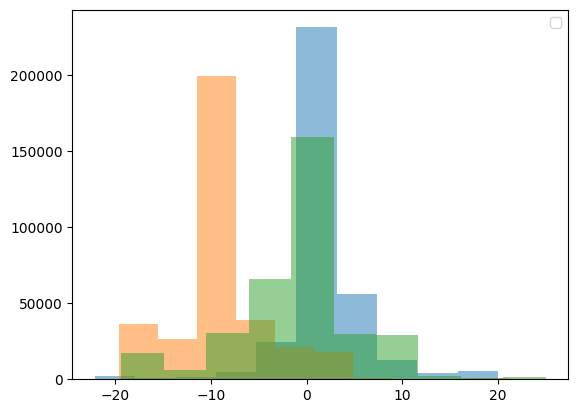

In [14]:
plt.hist(df['alx'].reset_index(drop=True), alpha=0.5)
plt.hist(df['aly'].reset_index(drop=True), alpha=0.5)
plt.hist(df['alz'].reset_index(drop=True), alpha=0.5)
plt.legend()
plt.show()

<ipython-input-15-6dd28f83ed16>:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


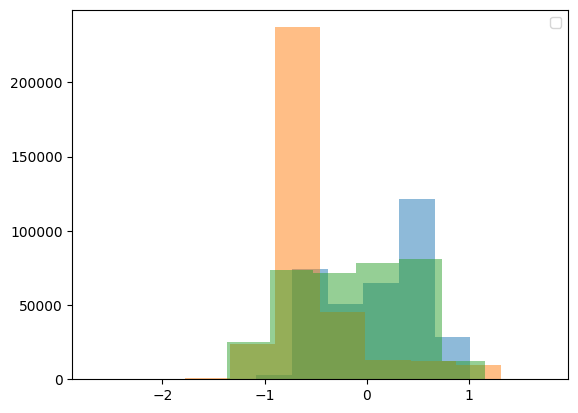

In [15]:
plt.hist(df['glx'].reset_index(drop=True), alpha=0.5)
plt.hist(df['gly'].reset_index(drop=True), alpha=0.5)
plt.hist(df['glz'].reset_index(drop=True), alpha=0.5)
plt.legend()
plt.show()

<ipython-input-16-2adf36e51365>:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


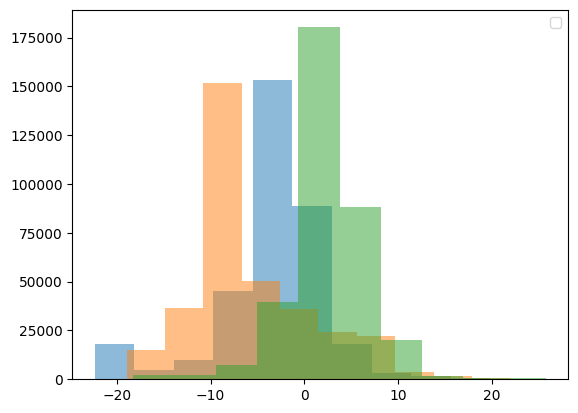

In [16]:
plt.hist(df['arx'].reset_index(drop=True), alpha=0.5)
plt.hist(df['ary'].reset_index(drop=True), alpha=0.5)
plt.hist(df['arz'].reset_index(drop=True), alpha=0.5)
plt.legend()
plt.show()

<ipython-input-17-d95ce494be48>:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


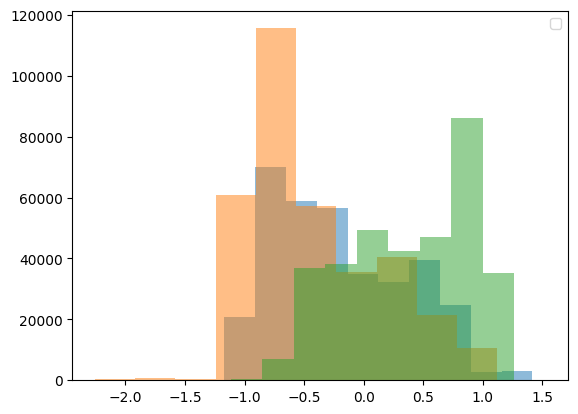

In [17]:
plt.hist(df['grx'].reset_index(drop=True), alpha=0.5)
plt.hist(df['gry'].reset_index(drop=True), alpha=0.5)
plt.hist(df['grz'].reset_index(drop=True), alpha=0.5)
plt.legend()
plt.show()

In [18]:
label_map = {
    0: 'Nothing',
    1: 'Standing still',
    2: 'Sitting and relaxing',
    3: 'Lying down',
    4: 'Walking',
    5: 'Climbing stairs',
    6: 'Waist bends forward',
    7: 'Frontal elevation of arms',
    8: 'Knees bending (crouching)',
    9: 'Cycling',
    10: 'Jogging',
    11: 'Running',
    12: 'Jump front & back'
}

In [19]:
def plot_comparison(data, metric):

  metric = metric[0].lower()
  data = data

  for i in range(0,13):
    plt.figure(figsize=(10,3))

    plt.subplot(1,2,1)
    plt.plot(data[ data['Activity']==i ].reset_index(drop=True)[metric+'lx'], color='red',alpha=0.5, label=metric+'lx')
    plt.plot(data[ data['Activity']==i ].reset_index(drop=True)[metric+'ly'],color='green', alpha=0.5, label=metric+'ly')
    plt.plot(data[ data['Activity']==i ].reset_index(drop=True)[metric+'lz'],color='blue', alpha=0.5, label=metric+'lz')
    plt.title(f'{label_map[i]} (left-ankle)')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(data[ data['Activity']==i ].reset_index(drop=True)[metric+'rx'], color ='red', alpha=0.5, label=metric+'rx')
    plt.plot(data[ data['Activity']==i ].reset_index(drop=True)[metric+'ry'],color='green', alpha=0.5, label=metric+'ry')
    plt.plot(data[ data['Activity']==i ].reset_index(drop=True)[metric+'rz'],color='blue', alpha=0.5, label=metric+'rz')
    plt.title(f'{label_map[i]} (right-lower-arm)')
    plt.legend()

    plt.show()
    print()

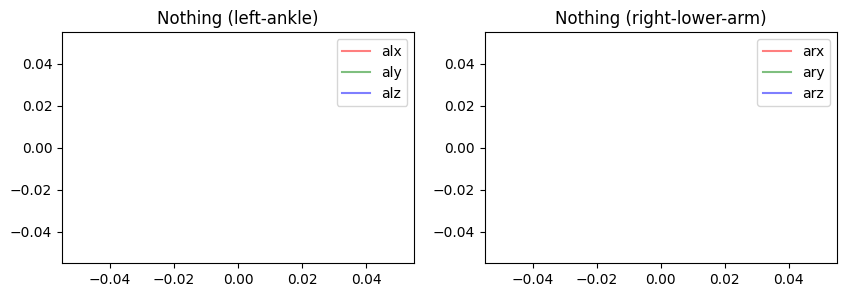

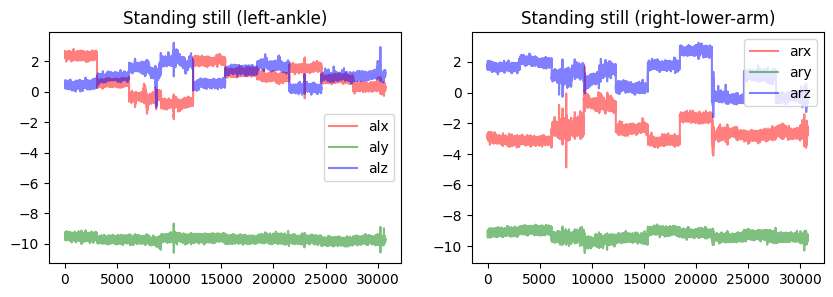

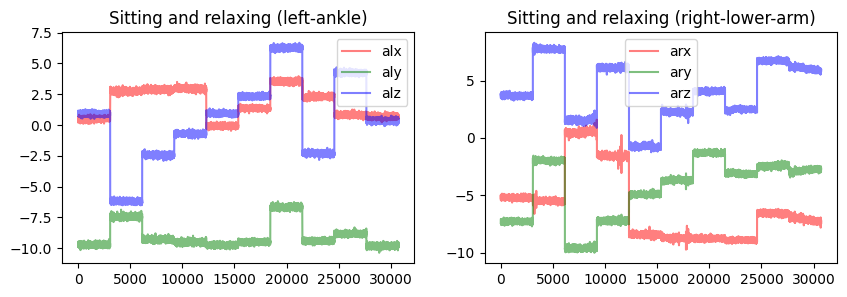

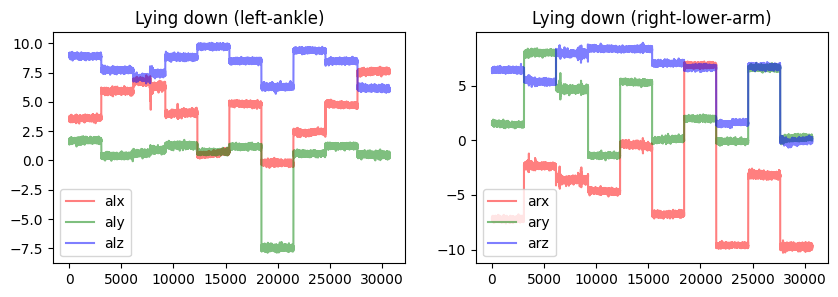

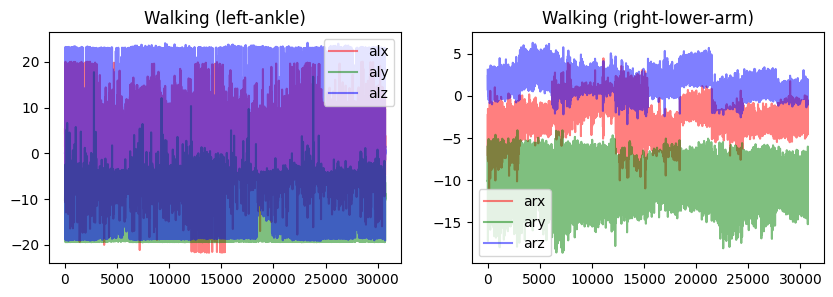

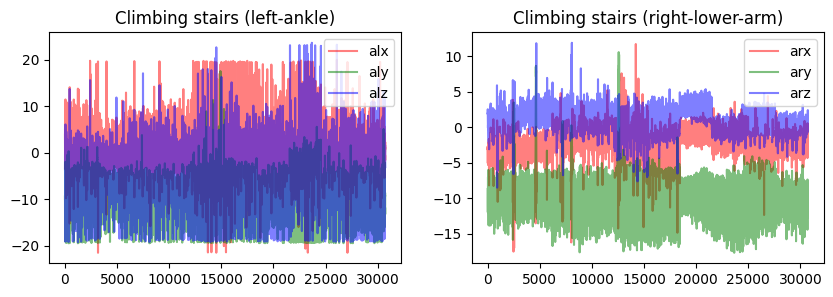

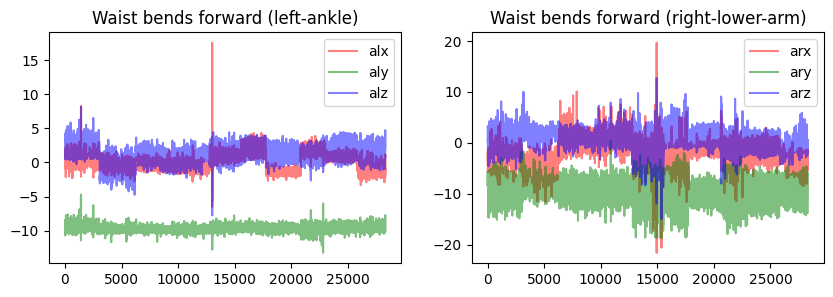

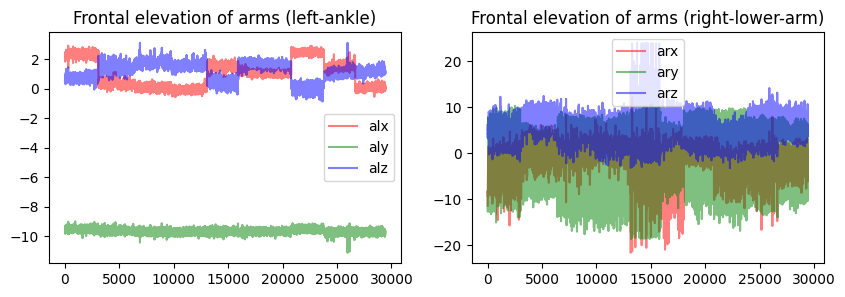

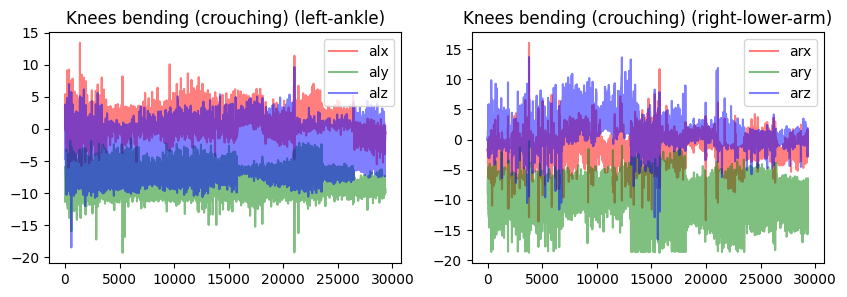

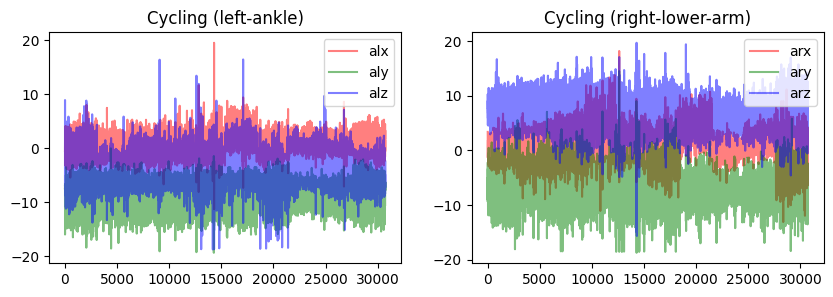

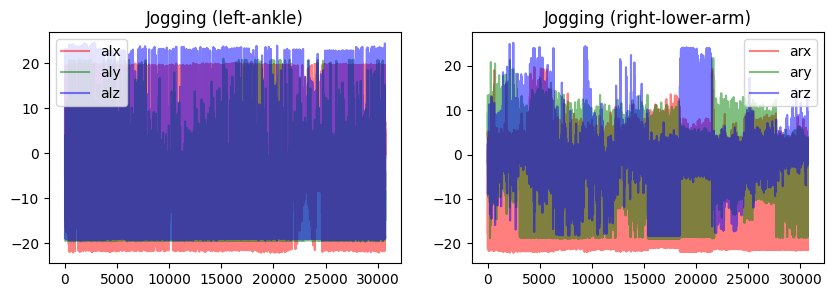

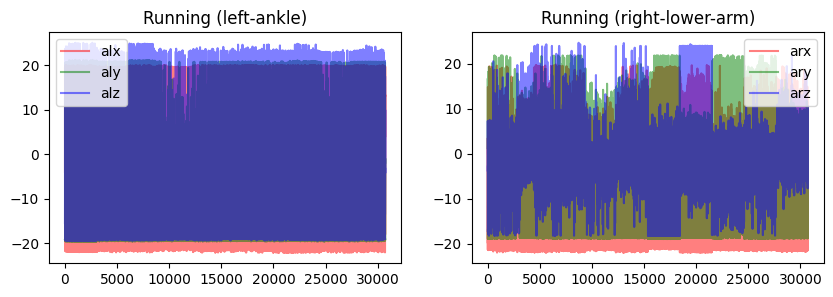

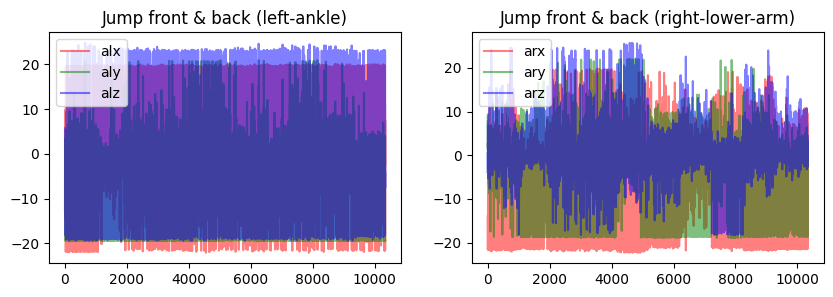

In [20]:
plot_comparison(df,'acceleration')

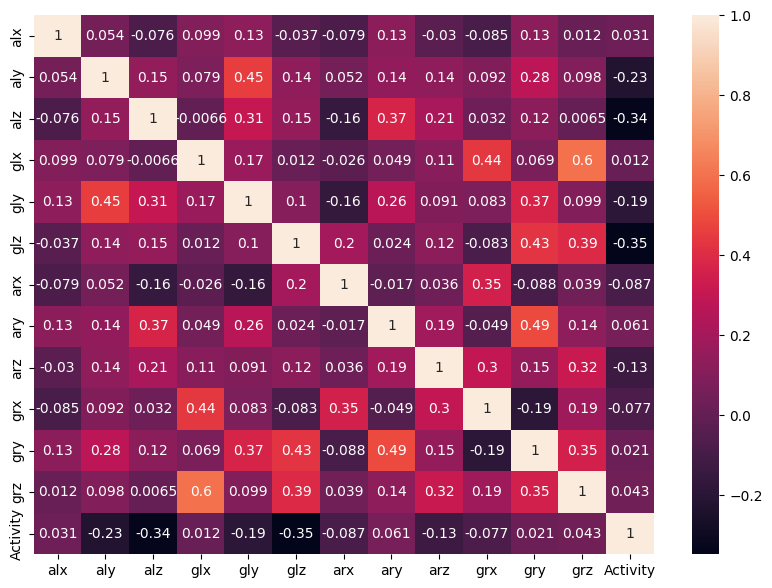

In [21]:
corr=df.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True)
plt.show()

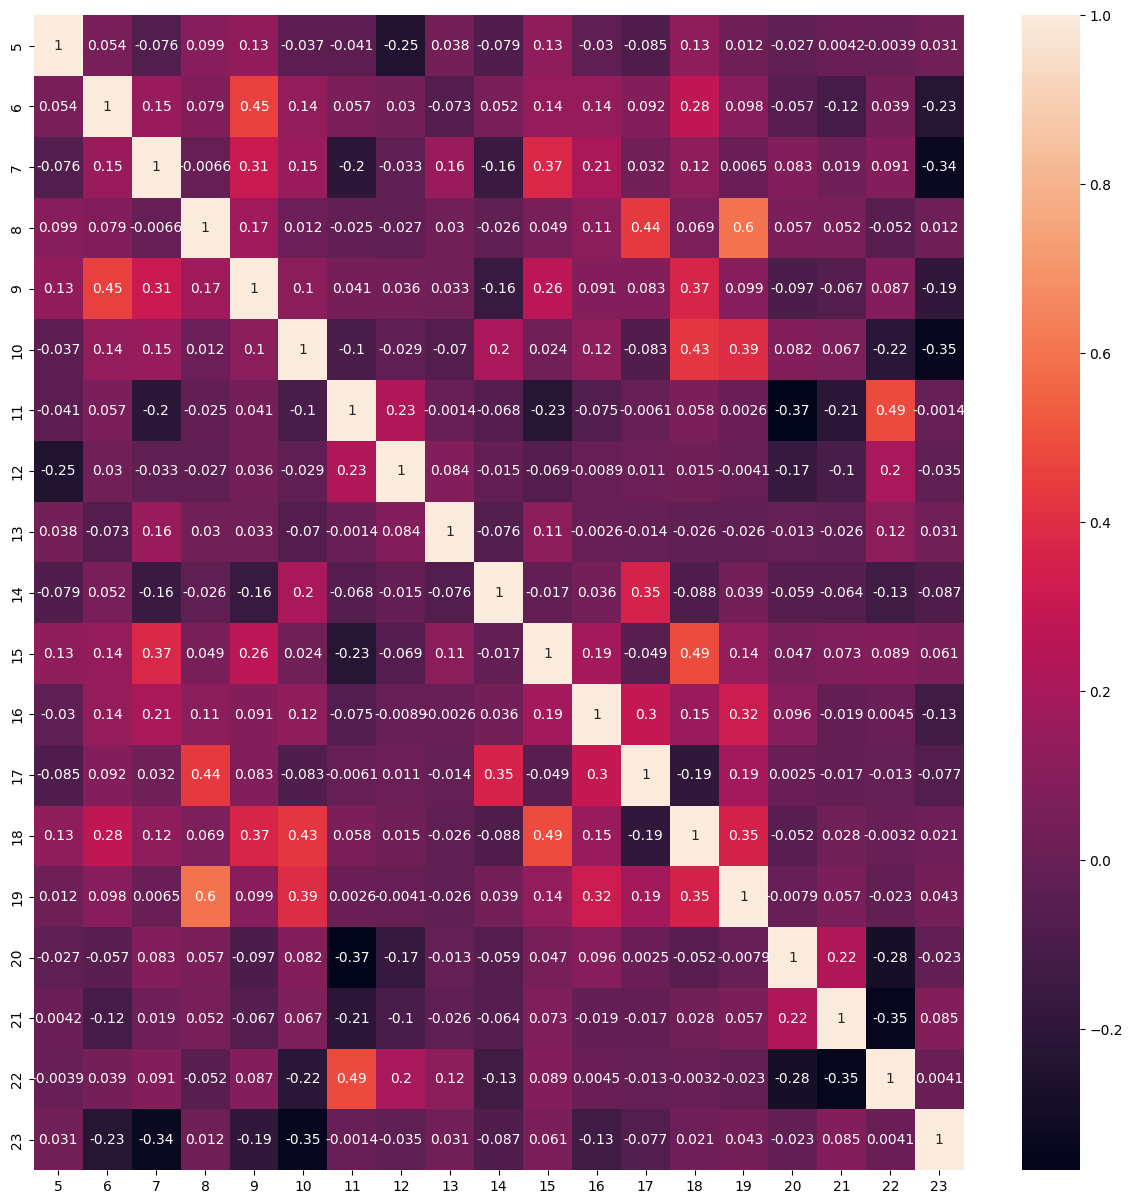

In [ ]:
df1 = df.columns[5:]
corr=df[df1].corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True)
plt.show()

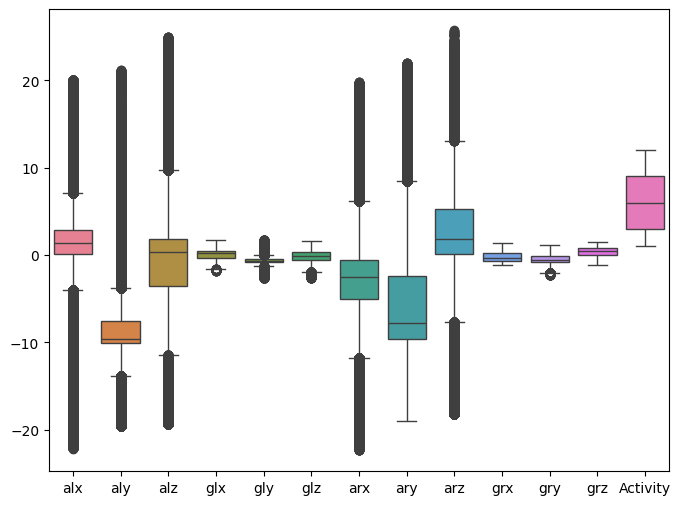

In [22]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df)
plt.show()

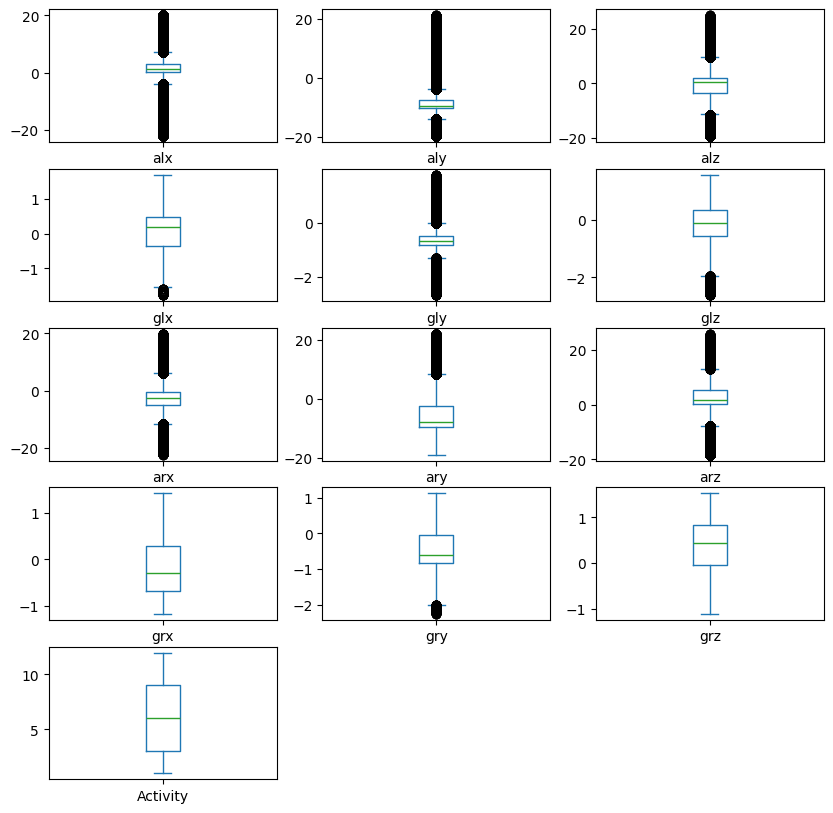

In [23]:
df.plot(kind='box',subplots=True,layout = (5,3),figsize=(10,10))
plt.show()

(array([61440., 30720., 30720., 30720., 28315., 29441., 29337., 30720.,
        30720., 41062.]),
 array([ 1. ,  2.1,  3.2,  4.3,  5.4,  6.5,  7.6,  8.7,  9.8, 10.9, 12. ]),
 <BarContainer object of 10 artists>)

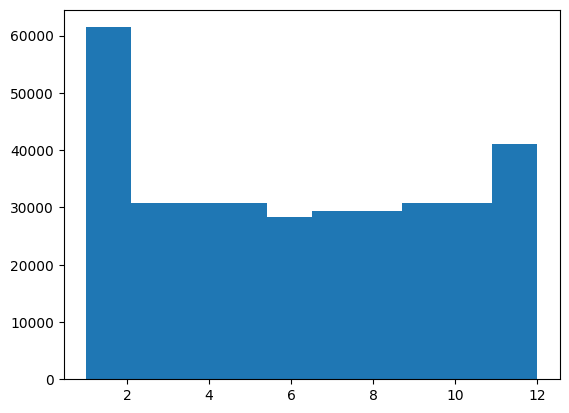

In [24]:
plt.hist(df['Activity'])

### Data Preparation
##### First, I split the data between the dependent variables and independent variable.
##### The independent variables will be stored in X and the target variable will be stored in y.

In [25]:
from sklearn.utils import resample

activity = 4000
df_min = pd.DataFrame()  # Create an empty DataFrame to store the sampled data

# Iterate over unique types in the df[23] column
for i in df['Activity'].unique():
    # Select 1000 instances of each type using resample
    df_type = resample(df[df['Activity'] == i], n_samples=activity, random_state=42)
    # Concatenate the sampled data with the df_min DataFrame
    df_min = pd.concat([df_min, df_type])

# Reset the index of the resulting DataFrame
df_min = df_min.reset_index(drop=True)
df_min.head()

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity
0,1.63850,-9.6523,0.11710,-0.647500,-0.25704,0.66994,-2.4406,-9.5148,-0.475740,-0.768630,-0.22382,-0.34698,1
1,1.21230,-9.6796,1.35110,0.025974,-0.83677,-0.60118,-2.9659,-8.8917,1.826200,0.198040,-1.06160,-0.24138,1
2,2.31390,-9.4103,0.55262,-0.215210,-0.87805,-0.50295,-3.0167,-9.2237,1.632600,-0.056863,-0.94456,-0.36638,1
3,0.57690,-9.7324,1.01910,0.638220,-0.69981,0.20825,-2.9241,-9.0717,1.827700,0.066667,-0.78850,0.90517,1
4,0.34257,-9.7620,1.02570,-0.176250,-0.69418,0.66405,-2.6925,-9.5905,-0.052443,-0.860780,-0.65298,0.20474,1


In [26]:
X = df_min.drop(['Activity'], axis=1)
X.head()

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz
0,1.63850,-9.6523,0.11710,-0.647500,-0.25704,0.66994,-2.4406,-9.5148,-0.475740,-0.768630,-0.22382,-0.34698
1,1.21230,-9.6796,1.35110,0.025974,-0.83677,-0.60118,-2.9659,-8.8917,1.826200,0.198040,-1.06160,-0.24138
2,2.31390,-9.4103,0.55262,-0.215210,-0.87805,-0.50295,-3.0167,-9.2237,1.632600,-0.056863,-0.94456,-0.36638
3,0.57690,-9.7324,1.01910,0.638220,-0.69981,0.20825,-2.9241,-9.0717,1.827700,0.066667,-0.78850,0.90517
4,0.34257,-9.7620,1.02570,-0.176250,-0.69418,0.66405,-2.6925,-9.5905,-0.052443,-0.860780,-0.65298,0.20474


In [27]:
y = df_min['Activity']
y

,Activity
0,1
1,1
2,1
3,1
4,1
...,...
47995,5
47996,5
47997,5
47998,5


### Train, Validation, & Test Data

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 42)
print("Length of training set:" +str(len(X_train)))

Length of training set:38400


In [30]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
std_scaler.fit(X)
X_train_std=std_scaler.transform(X_train)
X_test_std=std_scaler.transform(X_test)

X_train = pd.DataFrame(X_train_std, columns=X.columns)
X_test = pd.DataFrame(X_test_std, columns=X.columns)

In [31]:
display(X_train.head())
display(X_test.head())

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz
0,0.138802,-0.107700,0.171559,-0.650313,-0.759535,-0.637706,0.064665,-0.468293,-0.113044,0.277580,-0.945632,-1.422310
1,-0.594770,0.052578,0.033548,0.584115,-0.653347,0.735065,0.809428,-0.526216,0.879391,1.908479,-0.033434,0.849593
2,0.459086,1.975522,1.438249,0.676594,2.873592,0.879382,-0.596195,1.055961,0.900376,0.039442,2.047280,0.808364
3,-0.130455,-0.347299,0.157071,0.539881,0.050267,1.410889,0.400644,-0.685483,0.103241,0.320880,-0.282227,1.171199
4,-0.043101,-0.106324,0.282006,0.805267,-0.427646,-0.634176,-0.381078,-0.626527,1.796511,0.642010,-1.070019,0.433151


,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz
0,1.574419,-1.929438,-2.712939,-1.032300,-0.042665,-1.334653,1.644293,0.005137,-1.193570,-1.064668,0.271880,-1.933589
1,-5.215857,4.804649,3.756448,0.543912,0.143198,1.502406,-2.806537,-1.686645,-2.414467,-0.725504,1.180314,1.105233
2,-0.790187,1.712690,1.324811,-1.293676,0.652105,-1.500075,0.944041,1.325267,-0.962158,-1.439844,0.166345,-0.770839
3,-0.103654,-0.092769,0.334849,-0.119550,-0.715286,-0.838334,0.035131,-0.513374,-0.140532,0.793549,-1.194498,-1.146047
4,-0.274295,-0.136148,0.252909,1.167162,-0.325870,0.604831,0.076808,-0.490444,-0.066715,0.551804,-0.678005,0.985659


In [32]:
X_train.shape

(38400, 12)

In [33]:
X_test.shape

(9600, 12)

In [34]:
df_model_summary_cat = pd.DataFrame(
   {
      "Model": [],
      "Recall": [],
      "Specificity": [],
      "Precision": [],
      "Balanced Accuracy": [],
      "F1-Score": []
   }
)


def add_score_cat(model, recall, specificity, precision, balanced_accuracy, f1_score):
   df_model_summary_cat.loc[df_model_summary_cat.shape[0]] = [model, recall, specificity, precision, balanced_accuracy,
                                                              f1_score]

In [36]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42, C=10)
clf.fit(X_train, y_train.values.ravel())
y_train_pred = clf.predict(X_train)

# code to calculate accuracy scores and confusion matrices
print("Training Set:\n")
print(classification_report(y_train, y_train_pred))
print(confusion_matrix(y_train, y_train_pred))

matrix = confusion_matrix(y_train, y_train_pred)
print(matrix)
TN = matrix[0, 0]
FP = matrix[0, 1]
FN = matrix[1, 0]
TP = matrix[1, 1]
accuracy = accuracy_score(y_train, y_train_pred)
specificity = (TN / (TN + FP))
recall = recall_score(y_train, y_train_pred)
precision = precision_score(y_train, y_train_pred)
f1 = f1_score(y_train, y_train_pred)
print('Accuracy: %.2f' % accuracy)
print('Specificity: %.2f' % specificity)
print('Recall: %.2f' % recall)
print('Precision: %.2f' % precision)
print('F1-Score: %.2f' % f1)

add_score_cat("LogisticRegression", recall, specificity, precision, accuracy, f1)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Set:

              precision    recall  f1-score   support

           1       0.58      0.70      0.63      3186
           2       0.64      0.72      0.68      3170
           3       0.98      1.00      0.99      3255
           4       0.49      0.49      0.49      3206
           5       0.46      0.29      0.36      3193
           6       0.49      0.64      0.56      3213
           7       0.64      0.58      0.61      3206
           8       0.51      0.54      0.52      3180
           9       0.83      0.91      0.86      3186
          10       0.60      0.57      0.59      3193
          11       0.60      0.59      0.60      3219
          12       0.34      0.24      0.28      3193

    accuracy                           0.61     38400
   macro avg       0.60      0.61      0.60     38400
weighted avg       0.60      0.61      0.60     38400

[[2230    0    0  319    0  633    0    4    0    0    0    0]
 [   0 2281    0    0    7    0  338    0  246    0    

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [ ]:
pd.set_option('display.max_columns', 1000)
RANDOM_STATE = 42

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=RANDOM_STATE)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=RANDOM_STATE)

<Axes: xlabel='Activity'>

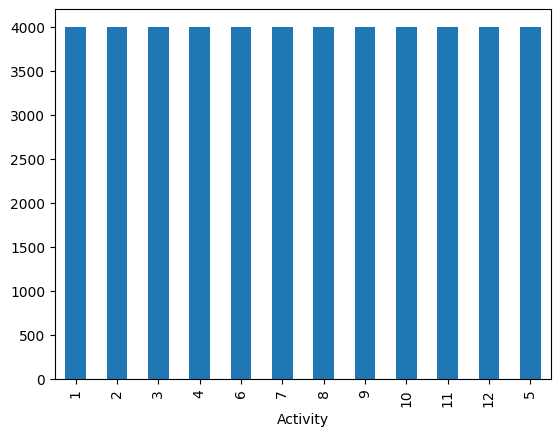

In [ ]:
y.value_counts().plot(kind='bar')

In [ ]:
# Standardization of the data
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_val = ss.transform(X_val)
X_test = ss.transform(X_test)

In [ ]:
X_train.shape

(30720, 12)

In [ ]:
X_val.shape

(7680, 12)

In [ ]:
X_test.shape

(9600, 12)

### Random Forest Classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
predtrarn = rf.predict(X_train)
predtestrn = rf.predict(X_val)

In [ ]:
met = metrics.classification_report(y_true = y_val, y_pred = predtestrn, output_dict = True)
print('Sensitivity: %.3f' %(met['1']['recall']))
#print('Specificity: %.3f' %(met['0']['recall']))
print('Precision: %.3f' %(met['1']['precision']))
print('Accuracy: %.3f' %(balanced_accuracy_score(y_val, predtestrn)))
print('F1 Score: %.3f' %(met['1']['f1-score']))
print('\n', metrics.classification_report(y_true = y_val, y_pred = predtestrn))

Sensitivity: 1.000
Precision: 0.998
Accuracy: 0.982
F1 Score: 0.999

               precision    recall  f1-score   support

           1       1.00      1.00      1.00       662
           2       1.00      1.00      1.00       622
           3       1.00      1.00      1.00       638
           4       0.97      0.99      0.98       649
           5       0.97      0.96      0.97       626
           6       0.98      0.99      0.98       608
           7       0.99      1.00      0.99       666
           8       0.99      0.96      0.98       617
           9       1.00      1.00      1.00       620
          10       0.96      0.95      0.96       670
          11       0.94      0.97      0.95       646
          12       0.98      0.97      0.98       656

    accuracy                           0.98      7680
   macro avg       0.98      0.98      0.98      7680
weighted avg       0.98      0.98      0.98      7680



In [ ]:
minlist = [100,200,300,400,500]
maxlist = [100,150,200,250,300]
elist = [10,20,30,40,50]

par = {'min_samples_split': minlist, 'max_depth': maxlist, 'n_estimators': elist, 'random_state': [42]}
grid = GridSearchCV(estimator = rf, param_grid = par, cv = 5, verbose = 1, n_jobs = -1, scoring = 'balanced_accuracy')
grid.fit(X_train, y_train)

Fitting 5 folds for each of 125 candidates, totalling 625 fits


KeyboardInterrupt: 

In [ ]:
grid.best_params_
grid.best_estimator_

RandomForestClassifier(max_depth=100, min_samples_split=100, n_estimators=50,
                       random_state=42)

In [ ]:
rnn = RandomForestClassifier(max_depth=100, min_samples_split=100, n_estimators=50, random_state=42)
rnn.fit(X_train, y_train)

RandomForestClassifier(max_depth=100, min_samples_split=100, n_estimators=50,
                       random_state=42)

In [ ]:
predtrain = rnn.predict(X_train)
predrn = rnn.predict(X_val)

In [ ]:
met = metrics.classification_report(y_true = y_val, y_pred = predrn, output_dict = True)
print('Sensitivity:',(met['1']['recall']))
print('Specificity:',(met['0']['recall']))
print('Precision:',(met['1']['precision']))
print('Balanced Accuracy:',(balanced_accuracy_score(y_val, predrn)))
print('F1 Score:',(met['1']['f1-score']))
print('\n', metrics.classification_report(y_true = y_val, y_pred = predrn))

Sensitivity: 0.9708121827411168
Specificity: 0.26683291770573564
Precision: 0.9646910466582598
Balanced Accuracy: 0.8577526260113453
F1 Score: 0.967741935483871

               precision    recall  f1-score   support

           0       0.89      0.27      0.41       802
           1       0.96      0.97      0.97       788
           2       0.97      1.00      0.99       819
           3       0.99      1.00      0.99       795
           4       0.81      0.96      0.88       783
           5       0.79      0.85      0.82       756
           6       0.70      0.95      0.80       806
           7       0.91      0.91      0.91       794
           8       0.85      0.78      0.82       761
           9       0.95      0.96      0.96       854
          10       0.81      0.77      0.79       797
          11       0.75      0.92      0.83       804
          12       0.86      0.81      0.83       841

    accuracy                           0.86     10400
   macro avg       0.87  

In [ ]:
minlist = [1,2,3,4,5]
maxlist = [10,15,20,25,30]
elist = [10,20,30,40,50]

rn = RandomForestClassifier(random_state=RANDOM_STATE)
par = {'min_samples_split': minlist, 'max_depth': maxlist, 'n_estimators': elist, 'random_state': [42]}
grid = GridSearchCV(estimator = rn, param_grid = par, cv = 5, verbose = 1, n_jobs = -1, scoring = 'balanced_accuracy')
grid.fit(X_train, y_train)
grid.best_params_
grid.best_estimator_

Fitting 5 folds for each of 125 candidates, totalling 625 fits


C:\Users\isabe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
125 fits failed out of a total of 625.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
125 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\isabe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\isabe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py", line 340, in fit
    self._validate_params()
  File "C:\Users\isabe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ba

RandomForestClassifier(max_depth=30, min_samples_split=4, n_estimators=50,
                       random_state=42)

In [ ]:
clf_rf = RandomForestClassifier(max_depth=20, n_estimators=10, random_state=42)
clf_rf.fit(X_train, y_train)
y_train_pred = clf_rf.predict(X_train)
y_val_pred = clf_rf.predict(X_val)

# code to calculate accuracy scores and confusion matrices
print("Training Set:\n")
print(classification_report(y_train, y_train_pred))
print(confusion_matrix(y_train, y_train_pred))

print("\nValidation Set:\n")
print(classification_report(y_val, y_val_pred))
matrix = confusion_matrix(y_val, y_val_pred)
print(matrix)
TN = matrix[0, 0]
FP = matrix[0, 1]
FN = matrix[1, 0]
TP = matrix[1, 1]
accuracy = accuracy_score(y_val, y_val_pred)
specificity = (TN / (TN + FP))
recall = recall_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
print('Accuracy: %.3f' % accuracy)
print('Specificity: %.3f' % specificity)
print('Recall: %.3f' % recall)
print('Precision: %.3f' % precision)
print('F1-Score: %.3f' % f1)

add_score_cat("RandomForestClassifier", recall, specificity, precision, accuracy, f1)

Training Set:

              precision    recall  f1-score   support

           0       1.00      0.95      0.98      1450
           1       0.98      1.00      0.99      1460
           2       1.00      1.00      1.00      1408
           3       1.00      1.00      1.00      1432
           4       1.00      1.00      1.00      1441
           5       1.00      1.00      1.00      1419
           6       0.99      1.00      1.00      1463
           7       1.00      1.00      1.00      1419
           8       1.00      1.00      1.00      1434
           9       1.00      1.00      1.00      1448
          10       1.00      1.00      1.00      1434
          11       1.00      1.00      1.00      1479
          12       1.00      1.00      1.00      1433

    accuracy                           1.00     18720
   macro avg       1.00      1.00      1.00     18720
weighted avg       1.00      1.00      1.00     18720

[[1384   29    3    3    4    2    6    5    4    5    0    5   

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_val = ss.transform(X_val)
X_test = ss.transform(X_test)

In [ ]:
def error_rmse(true, pred):
    '''
    Returns the RMSE based on given true and predicted arrays.
    Both inputs are assumed to be numoy arrays
    '''
    from sklearn import metrics
    return np.sqrt(metrics.mean_squared_error(true, pred))